In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None) # Deshabilita SettingWithCopyWarning. Ojo.

In [38]:
path = "/home/andres/Desktop/Trabajo Practico/train.csv"
df = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [39]:
"UNIFICO ALGUNOS VALORES"
df.loc[df['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
df.loc[df['tipodepropiedad'] == 'Departamento Compartido', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Apartamento', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Edificio', 'tipodepropiedad'] = 'Departamento'
df.loc[df['tipodepropiedad'] == 'Local Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Bodega comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Terreno comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Oficina Comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Local en centro comercial', 'tipodepropiedad'] = 'Oficina comercial'
df.loc[df['tipodepropiedad'] == 'Nave industrial', 'tipodepropiedad'] = 'Terreno industrial'
df['tipodepropiedad'].value_counts()

Casa                             142425
Departamento                      58878
Casa en condominio                19297
Terreno                            9945
Oficina comercial                  7693
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Otros                               134
Terreno industrial                  107
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

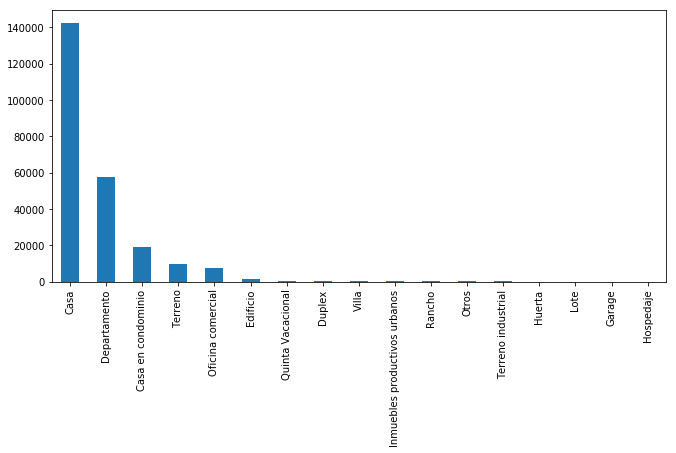

In [5]:
df['tipodepropiedad'].value_counts().plot(kind='bar',figsize=(11,5))

In [6]:
df2 = df.copy()
df2.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Departamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Departamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00


In [7]:
df2['aux'] = 1
group = df2.groupby(['provincia','tipodepropiedad'])['aux'].count()
group.head(15)

provincia              tipodepropiedad              
Aguascalientes         Casa                             1346
                       Casa en condominio                197
                       Departamento                       47
                       Edificio                            6
                       Inmuebles productivos urbanos       3
                       Oficina comercial                  55
                       Quinta Vacacional                   7
                       Terreno                            86
                       Terreno industrial                  1
                       Villa                               5
Baja California Norte  Casa                             2771
                       Casa en condominio                166
                       Departamento                      201
                       Duplex                             23
                       Oficina comercial                  27
Name: aux, dtype: int64

In [8]:
group2 = group.reset_index()
group2.head()

,provincia,tipodepropiedad,aux
0,Aguascalientes,Casa,1346
1,Aguascalientes,Casa en condominio,197
2,Aguascalientes,Departamento,47
3,Aguascalientes,Edificio,6
4,Aguascalientes,Inmuebles productivos urbanos,3


In [9]:
group3 = group2.loc[group2.groupby('provincia')['aux'].idxmax()]

In [10]:
group3.head()

,provincia,tipodepropiedad,aux
0,Aguascalientes,Casa,1346
10,Baja California Norte,Casa,2771
20,Baja California Sur,Casa,1478
31,Campeche,Casa,211
40,Chiapas,Casa,907


In [11]:
import geopandas as gpd
geoframe = gpd.read_file("/home/andres/Desktop/mexEstados")

In [12]:
merge = geoframe.merge(group3,left_on='ESTADO',right_on='provincia')
merge.head()

,CODIGO,ESTADO,geometry,provincia,tipodepropiedad,aux
0,MX03,Baja California Sur,(POLYGON ((-111.2061233520508 25.8027763366699...,Baja California Sur,Casa,1478
1,MX18,Nayarit,(POLYGON ((-106.6210784912109 21.5653114318847...,Nayarit,Casa,981
2,MX14,Jalisco,"POLYGON ((-101.52490234375 21.85663986206055, ...",Jalisco,Casa,14255
3,MX01,Aguascalientes,POLYGON ((-101.8461990356445 22.01176071166992...,Aguascalientes,Casa,1346
4,MX11,Guanajuato,POLYGON ((-100.2802963256836 20.20450973510742...,Guanajuato,Casa,2326


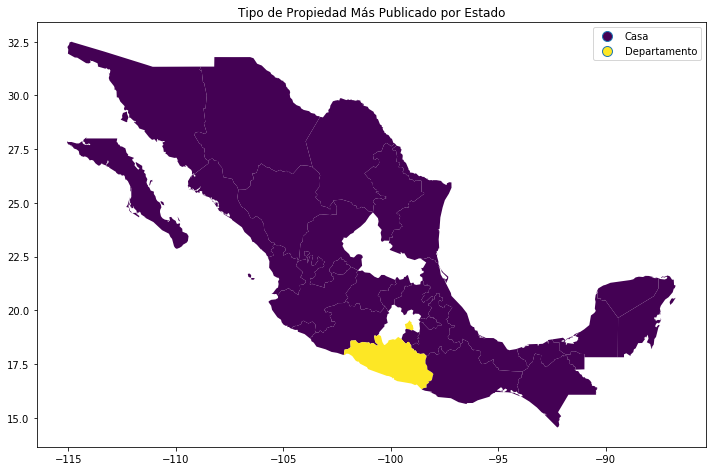

In [13]:
geoplot = merge.plot(figsize=(12,12),column='tipodepropiedad',legend=True,cmap='viridis').set_title('Tipo de Propiedad Más Publicado por Estado')

In [14]:
print("ANALISIS DEL PRECIO POR METRO CUADRADO EN FUNCION DEL TIEMPO")
df5 = df.copy()
df5['PRECIOM2'] = df5['precio']/df5['metrostotales']
df5_filtrado = df5[df5['provincia']=='Distrito Federal']
df5_filtrado.head()

ANALISIS DEL PRECIO POR METRO CUADRADO EN FUNCION DEL TIEMPO


,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,PRECIOM2
id,,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Departamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00,28412.50
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00,20000.00
126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Departamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.00,2.00,1.00,1.00,75.00,90.00,23650.00,19.30,-99.15,2014-03-18,0.00,0.00,0.00,0.00,1.00,1100000.00,12222.22
130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.00,nan,0.00,nan,227.00,185.00,50003995.00,19.37,-99.15,2015-03-31,0.00,0.00,0.00,0.00,0.00,3000000.00,16216.22
73348,"oportunidad, departamento col del valle, 3 rec...",magnifico departamento con excelente distribuc...,Departamento,Pazaje Santa Cruz,Benito Juárez,Distrito Federal,5.00,3.00,2.00,nan,127.00,127.00,50003995.00,nan,nan,2016-10-30,0.00,0.00,0.00,1.00,1.00,4750000.00,37401.57


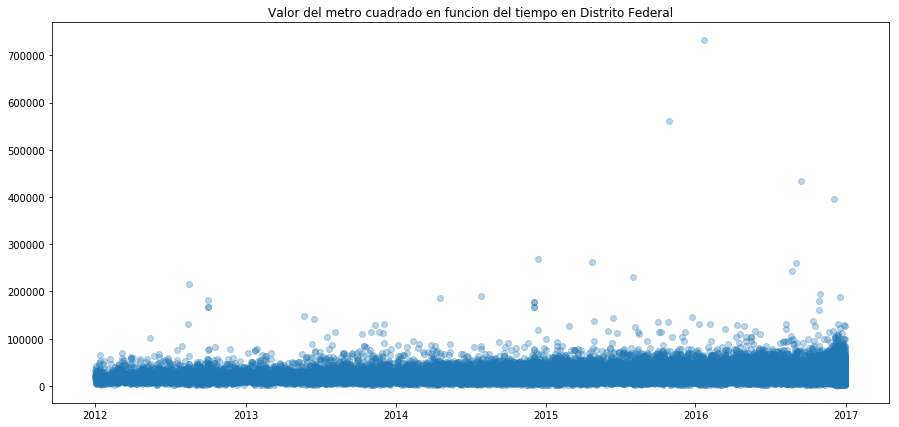

In [15]:
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
fig = plt.scatter(x=df5_filtrado.fecha.tolist(), y=df5_filtrado.PRECIOM2,alpha=0.3)
plt.title('Valor del metro cuadrado en funcion del tiempo en Distrito Federal')
plt.show()

In [16]:
"ANALISIS ESTADOS PRINCIPALES"
"UNIFICO ALGUNOS VALORES"
dfEP = df.copy()
dfEP.loc[dfEP['tipodepropiedad'] == 'Casa uso de suelo', 'tipodepropiedad'] = 'Casa'
dfEP.loc[dfEP['tipodepropiedad'] == 'Departamento Compartido', 'tipodepropiedad'] = 'Departamento'
dfEP.loc[dfEP['tipodepropiedad'] == 'Apartamento', 'tipodepropiedad'] = 'Departamento'
dfEP.loc[dfEP['tipodepropiedad'] == 'Edificio', 'tipodepropiedad'] = 'Departamento'
dfEP.loc[dfEP['tipodepropiedad'] == 'Local Comercial', 'tipodepropiedad'] = 'Oficina comercial'
dfEP.loc[dfEP['tipodepropiedad'] == 'Bodega comercial', 'tipodepropiedad'] = 'Oficina comercial'
dfEP.loc[dfEP['tipodepropiedad'] == 'Terreno comercial', 'tipodepropiedad'] = 'Oficina comercial'
dfEP.loc[dfEP['tipodepropiedad'] == 'Oficina Comercial', 'tipodepropiedad'] = 'Oficina comercial'
dfEP.loc[dfEP['tipodepropiedad'] == 'Local en centro comercial', 'tipodepropiedad'] = 'Oficina comercial'
dfEP.loc[dfEP['tipodepropiedad'] == 'Nave industrial', 'tipodepropiedad'] = 'Terreno industrial'

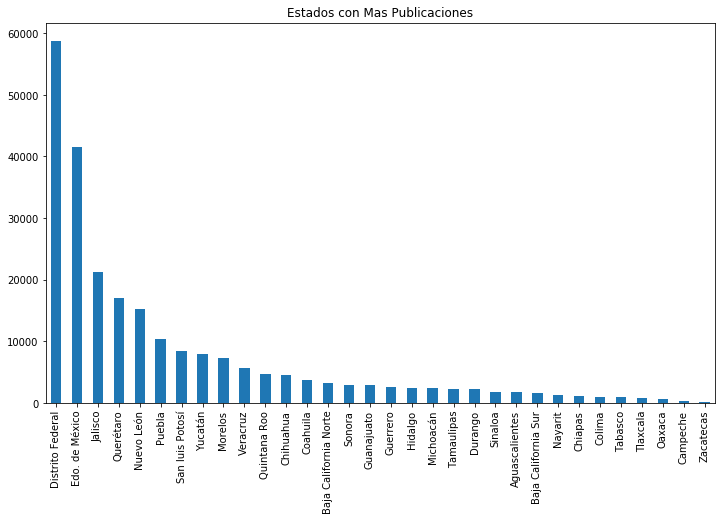

In [17]:
dfEP['provincia'].value_counts().plot(kind='bar',figsize=(12,7),title='Estados con Mas Publicaciones')

In [18]:
estadosPrincipales = ['Distrito Federal','Edo. de México','Jalisco','Querétaro','Nuevo León']

def esEstadoPrincipal(x):
    return x in estadosPrincipales

dfEP['esEstadoPrincipal'] = dfEP.provincia.apply(esEstadoPrincipal)
dfEP_filtrado = dfEP[dfEP['esEstadoPrincipal']]
dfEP_filtrado.sample(10)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,esEstadoPrincipal
id,,,,,,,,,,,,,,,,,,,,,,,
123252,"casa contry . , n.l.","<p>casa en contry con cuatro niveles, dos plan...",Casa,NaN,Monterrey,Nuevo León,0.00,3.00,2.00,4.00,nan,400.00,69113.00,nan,nan,2013-12-11,0.00,0.00,0.00,0.00,0.00,5000000.00,True
20412,oportunidad estrene casa venta real de juriqui...,estrene casa amplia e iluminada! \namplia sala...,Casa,Cascada,Querétaro,Querétaro,0.00,3.00,nan,3.00,223.00,300.00,127621.00,nan,nan,2016-10-02,0.00,0.00,0.00,0.00,0.00,2600000.00,True
243517,ajusco hermosa casa condominio,preciosa casa en condominio en área arbolada e...,Casa en condominio,Narciso Mendoza,Tlalpan,Distrito Federal,10.00,3.00,nan,2.00,167.00,155.00,24823.00,nan,nan,2016-09-09,0.00,0.00,0.00,0.00,0.00,2950000.00,True
171502,teoluli,3casas en venta ¡condominio con vista panorámi...,Casa,Teoluli No. 10,Tlalpan,Distrito Federal,2.00,4.00,nan,3.00,302.00,110.00,24892.00,19.25,-99.17,2015-10-27,0.00,0.00,0.00,0.00,0.00,3500000.00,True
8530,"residencia familiar , av jesús del monte 46","a 5min de santa fe, se encuentra ubicado el de...",Casa,Av. Jesús del monte 46,Cuajimalpa de Morelos,Distrito Federal,0.00,3.00,2.00,3.00,244.00,254.00,23771.00,19.36,-99.29,2015-11-02,1.00,1.00,0.00,0.00,1.00,4774890.00,True
46108,departamento en venta en cuauhtémoc,"-- rav- -- magnifico departamento exterior,...",Departamento,Río Nilo 55,Cuauhtémoc,Distrito Federal,32.00,3.00,1.00,2.00,170.00,nan,23837.00,nan,nan,2014-09-25,0.00,0.00,0.00,0.00,0.00,4700000.00,True
269062,preciosa casa en ixtacala tlalnepantla,preciosa casa en lla ixtacala tlalnepantla \n...,Casa,XOCOYOHUALCO PRADO IXTACALA,Tlalnepantla de Baz,Edo. de México,5.00,4.00,3.00,2.00,220.00,200.00,56346.00,nan,nan,2016-03-20,0.00,0.00,0.00,0.00,1.00,2980000.00,True
218301,departamento 2 plantas en tlalnepantla,"unidad el rosario, tlalnepantla, edo. de mexic...",Departamento,El Rosario II,Tlalnepantla de Baz,Edo. de México,10.00,2.00,1.00,1.00,60.00,55.00,288657.00,nan,nan,2014-05-02,0.00,0.00,0.00,0.00,0.00,549000.00,True
82017,lomas estrella bonito departamento,bonito departamento dentro de una unidad habit...,Departamento,Siracusa 240 col. lomas estrella,Iztapalapa,Distrito Federal,10.00,2.00,1.00,1.00,63.00,63.00,24448.00,nan,nan,2016-05-27,0.00,0.00,0.00,1.00,1.00,1250000.00,True


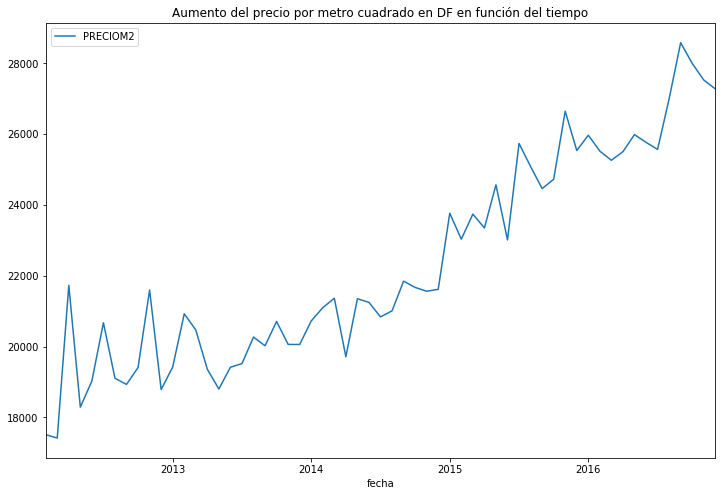

In [19]:
df6 = df5_filtrado.copy()
df6['año'] = df6['fecha'].dt.year
df6['mes'] = df6['fecha'].dt.month
group6 = df6.groupby(['año','mes'])['PRECIOM2'].mean()
df6_1 = group6.reset_index()
df6_1['fecha'] = df6_1['año'] + df6_1['mes']/12
df6_1.head()
df6_1 = df6_1[df6_1['fecha']<=(2016+11/12)]
df6_1.plot.line(x='fecha',y='PRECIOM2',figsize=(12,8),title='Aumento del precio por metro cuadrado en DF en función del tiempo')

In [20]:
"10 Provincias donde MENOS aumento la popularidad el ultimo año"

df7 = df.copy()
df7['aux'] = 1
df7['año'] = df7['fecha'].dt.year
group7 = df7.groupby(['provincia','año'])['aux'].count()


In [21]:
df7_1 = group7.reset_index()
df7_1.head()

,provincia,año,aux
0,Aguascalientes,2012,177
1,Aguascalientes,2013,374
2,Aguascalientes,2014,339
3,Aguascalientes,2015,279
4,Aguascalientes,2016,584


In [22]:
dfStack = group7.unstack().reset_index()
dfStack.head()
dfStack['proporcionAumento'] = dfStack[2016]/dfStack[2015]
dfStackFiltrado = dfStack[dfStack[2016]>300]
dfStackFiltrado.head()

año,provincia,2012,2013,2014,2015,2016,proporcionAumento
0,Aguascalientes,177,374,339,279,584,2.09
1,Baja California Norte,301,406,756,907,850,0.94
4,Chiapas,162,219,210,122,413,3.39
5,Chihuahua,254,888,905,938,1605,1.71
6,Coahuila,483,816,656,603,1137,1.89


In [23]:
dfStackSorted = dfStackFiltrado.sort_values(by='proporcionAumento',ascending=False)
dfStackSorted.head(10)
dfStackSortedFiltrado = dfStackSorted[dfStackSorted['proporcionAumento']>=2.12]

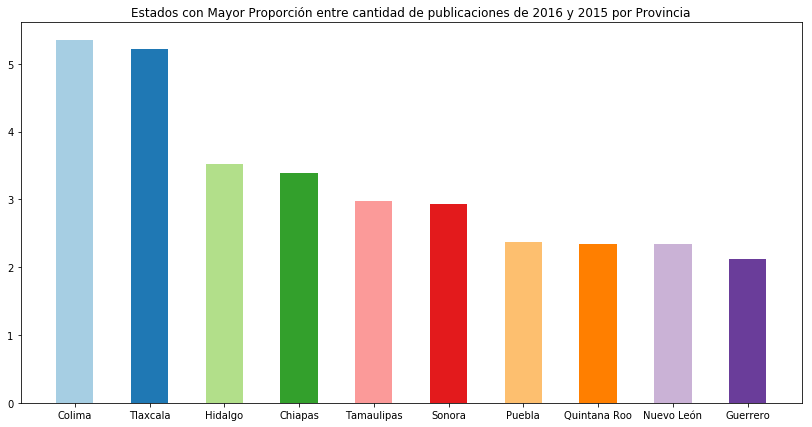

In [24]:
plt.figure(figsize=(14,7))
plt.title("Estados con Mayor Proporción entre cantidad de publicaciones de 2016 y 2015 por Provincia") 
plot = plt.bar(dfStackSortedFiltrado["provincia"], dfStackSortedFiltrado["proporcionAumento"], color=plt.cm.Paired(np.arange(len(dfStackSortedFiltrado))),width=0.5)

In [25]:
dfStackSortedInverse = dfStackFiltrado.sort_values(by='proporcionAumento',ascending=True)
dfStackSortedInverse.head(10)
dfStackSortedInverseFiltrado = dfStackSortedInverse[dfStackSortedInverse['proporcionAumento']<=1.88]

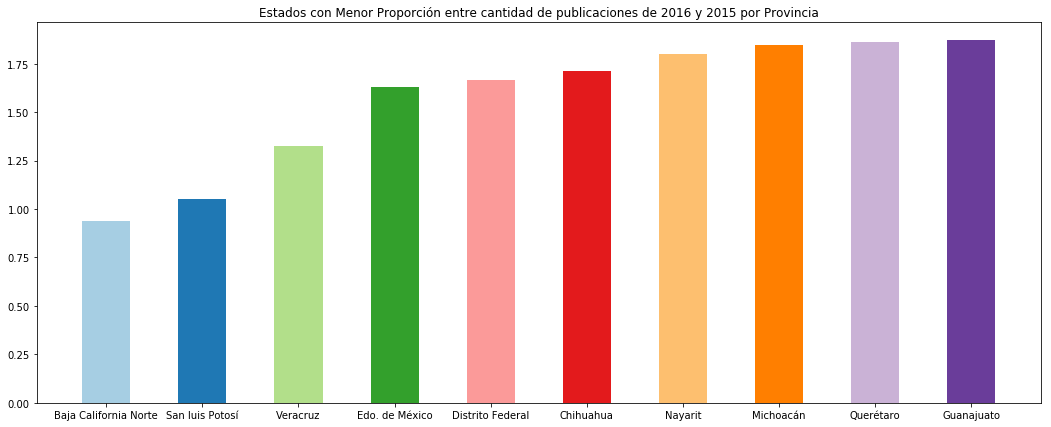

In [26]:
plt.figure(figsize=(18,7))
plt.title("Estados con Menor Proporción entre cantidad de publicaciones de 2016 y 2015 por Provincia") 
plot = plt.bar(dfStackSortedInverseFiltrado["provincia"], dfStackSortedInverseFiltrado["proporcionAumento"], color=plt.cm.Paired(np.arange(len(dfStackSortedInverseFiltrado))),width=0.5)

In [27]:
df.head()

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Departamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,80.00,80.00,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,268.00,180.00,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,144.00,166.00,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,63.00,67.00,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Departamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,95.00,95.00,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00


In [40]:
df8 = df.copy()
df8['preciom2'] = df8['precio']/df8['metrostotales']
group8 = df8.groupby(['provincia','tipodepropiedad'])['preciom2'].mean()
group8.head()

provincia       tipodepropiedad              
Aguascalientes  Casa                             7533.39
                Casa en condominio               9400.23
                Departamento                    33980.16
                Inmuebles productivos urbanos   14928.57
                Oficina comercial                9952.40
Name: preciom2, dtype: float64

In [41]:
df8_1 = group8.reset_index()
df8_1.head()
df8_2 = df8_1.loc[df8_1.groupby('provincia')['preciom2'].idxmax()]
df8_2.head()

,provincia,tipodepropiedad,preciom2
8,Aguascalientes,Villa,47378.17
15,Baja California Norte,Rancho,19345.79
21,Baja California Sur,Departamento,18213.71
34,Campeche,Oficina comercial,42311.90
43,Chiapas,Quinta Vacacional,23287.67


In [46]:
df9 = df8.copy()
df9['aux'] = 1
group9 = df9.groupby(['provincia','tipodepropiedad'])['aux'].count()
df9_1 = group9.reset_index()
df9_1.head()

,provincia,tipodepropiedad,aux
0,Aguascalientes,Casa,1346
1,Aguascalientes,Casa en condominio,197
2,Aguascalientes,Departamento,53
3,Aguascalientes,Inmuebles productivos urbanos,3
4,Aguascalientes,Oficina comercial,55


In [47]:
merge8_9 = df8_1.merge(df9_1,on=['provincia','tipodepropiedad'])
merge8_9.head()
                       

,provincia,tipodepropiedad,preciom2,aux
0,Aguascalientes,Casa,7533.39,1346
1,Aguascalientes,Casa en condominio,9400.23,197
2,Aguascalientes,Departamento,33980.16,53
3,Aguascalientes,Inmuebles productivos urbanos,14928.57,3
4,Aguascalientes,Oficina comercial,9952.40,55


In [49]:
merge8_9_filtrado = merge8_9[merge8_9['aux']>10]
df10 = merge8_9_filtrado.loc[merge8_9_filtrado.groupby('provincia')['preciom2'].idxmax()]
df10.head()

,provincia,tipodepropiedad,preciom2,aux
2,Aguascalientes,Departamento,33980.16,53
11,Baja California Norte,Departamento,7347.26,201
21,Baja California Sur,Departamento,18213.71,86
30,Campeche,Casa en condominio,17161.98,11
39,Chiapas,Departamento,22664.02,65


In [51]:
import geopandas as gpd
geoframe = gpd.read_file("/home/andres/Desktop/mexEstados")
merge10 = geoframe.merge(df10,left_on='ESTADO',right_on='provincia')
merge10.head()

,CODIGO,ESTADO,geometry,provincia,tipodepropiedad,preciom2,aux
0,MX03,Baja California Sur,(POLYGON ((-111.2061233520508 25.8027763366699...,Baja California Sur,Departamento,18213.71,86
1,MX18,Nayarit,(POLYGON ((-106.6210784912109 21.5653114318847...,Nayarit,Departamento,23079.90,114
2,MX14,Jalisco,"POLYGON ((-101.52490234375 21.85663986206055, ...",Jalisco,Rancho,40163.72,23
3,MX01,Aguascalientes,POLYGON ((-101.8461990356445 22.01176071166992...,Aguascalientes,Departamento,33980.16,53
4,MX11,Guanajuato,POLYGON ((-100.2802963256836 20.20450973510742...,Guanajuato,Departamento,12280.24,160


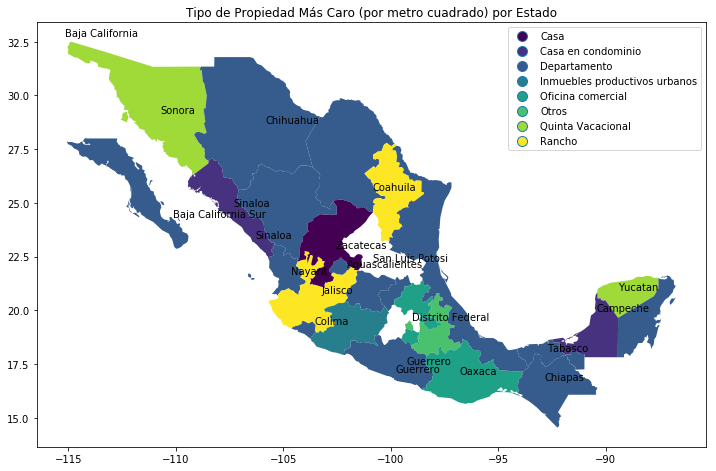

In [59]:
geoplot10 = merge10.plot(figsize=(12,12),column='tipodepropiedad',legend=True,cmap='viridis')
geoplot10.set_title('Tipo de Propiedad Más Caro (por metro cuadrado) por Estado')
for locacion,label in zip(geoframeCiudadesFiltrado.geometry, geoframeCiudadesFiltrado.STATE_NAME):
    geoplot10.annotate(label, xy=(locacion.x,locacion.y), xytext=(3, 3), textcoords="offset points")
plt.show()

In [56]:
geoframeCiudades = gpd.read_file("/home/andres/Desktop/mexCiudades")
estados_a_filtrar = ["Morelos","Veracruz","Puebla","Hidalgo","Guanajuato","Durango",
                     "Queretaro","Nuevo Leon","Quintana Roo","Tamaulipas","Tlaxcala","Michoacan","Mexico"]
def filtrar(x):
    return x not in estados_a_filtrar

geoframeCiudades['aFiltrar'] = geoframeCiudades['STATE_NAME'].apply(filtrar)
geoframeCiudadesFiltrado = geoframeCiudades[geoframeCiudades['aFiltrar']]
#geoframeCiudades.head(25)

#geoframeCiudadesFiltrado.head(50)
geoframeCiudadesFiltrado.head(40)

,NAME,CAPITAL,STATE_NAME,geometry,aFiltrar
1,Mazatlan,N,Sinaloa,POINT (-106.4160690307617 23.20383262634277),True
2,Guadalajara,Y,Jalisco,POINT (-103.3437957763672 20.67359161376953),True
4,Mexico City,C,Distrito Federal,POINT (-99.12757110595703 19.42704582214355),True
7,Oaxaca,Y,Oaxaca,POINT (-96.95134735107422 16.90743064880371),True
8,Merida,Y,Yucatan,POINT (-89.55286407470703 20.82186889648438),True
9,Mexicali,Y,Baja California,POINT (-115.2942352294922 32.62020492553711),True
10,Aguascalientes,Y,Aguascalientes,POINT (-102.1863403320312 21.85334777832031),True
11,Campeche,Y,Campeche,POINT (-90.54466247558594 19.80398750305176),True
12,La Paz,Y,Baja California Sur,POINT (-110.2538604736328 24.1898307800293),True
13,Tuxtla Gutierrez,Y,Chiapas,POINT (-92.99516296386719 16.63029670715332),True
